# **EXERCISE 2 - Coomputing network properties with NetworkX**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

#### **a) Load the edge list and visualize the network.**

In [2]:
from google.colab import drive

# This will authorize Colab to access Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


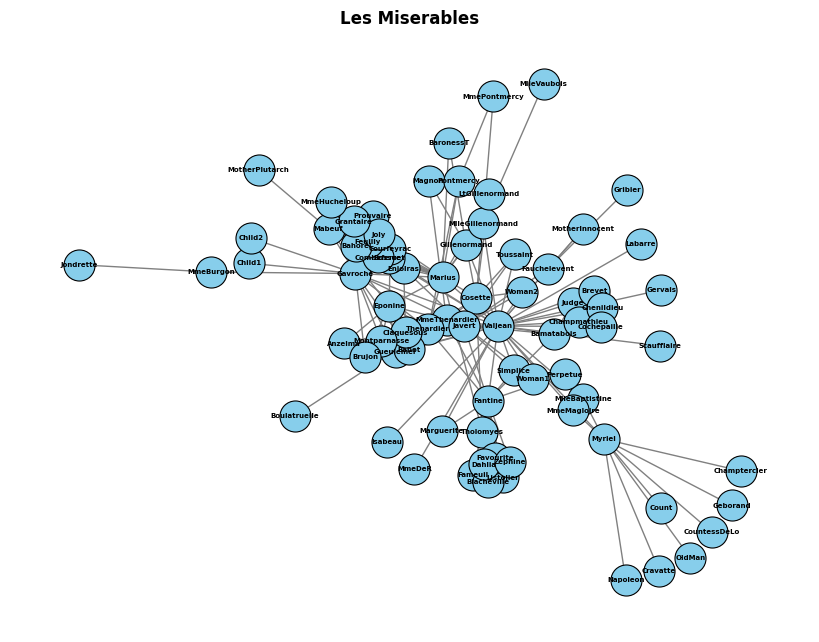

In [9]:
# Define the path to network file
file_path = "/content/drive/MyDrive/Complex Networks /les_miserables_edge_file.edg"
M = nx.read_weighted_edgelist(file_path)

plt.figure(figsize=(8, 6))

nx.draw(M,
        with_labels=True,
        font_size=5,
        node_color='skyblue',edgecolors='black', linewidths=0.8,
        edge_color='gray', width=1,
        font_weight='bold', node_size=500)

plt.title("Les Miserables", fontweight="bold")
plt.show()

 #### **b) Calculate the edge density of the Les Miserables network. First, write your own code without using nx.density and then compare your result to the output of nx.density (the corresponding NetworkX function). Report up to three digits.**


In [10]:
n = M.number_of_nodes()
m = M.number_of_edges()

#Edge density without using nx.density
edge_density_own = 2*m/(n*(n-1))
edge_density_own = round(edge_density_own,3)

#Edge density using nx.density
edge_density_nx = nx.density(M)
edge_density_nx = round(edge_density_nx,3)

print('Edge density self-written algorithm:', edge_density_own)
print('Edge density from NetworkX:',edge_density_nx)

Edge density self-written algorithm: 0.087
Edge density from NetworkX: 0.087


#### **c) Calculate the average shortest path length hli of the network using the relevant ready-made NetworkX function. Report up to three digits.**

In [11]:
l = nx.average_shortest_path_length(M)
l = round(l,3)
print('Average shortest path length:',l)

Average shortest path length: 2.641


#### **d) Calculate the average clustering coefficient of the network using the relevant readymade NetworkX function. Report up to three digits.**

In [12]:
avg_clustering_coefficient = nx.average_clustering(M)
avg_clustering_coefficient = round(avg_clustering_coefficient, 3)
print('Average clustering coefficient:', avg_clustering_coefficient)

Average clustering coefficient: 0.573


#### **e) Calculate the degree distribution $P(k)$ and the complementary cumulative degree distribution $CCDF(k)$ of the network. Plot the distributions using Matplotlib.**

In [19]:
# Calculate the degree distribution and percentages
degree_distribution = nx.degree_histogram(M)
total_nodes = len(M)


for degree, count in enumerate(degree_distribution):
        percentage = (count / total_nodes) * 100
        print(f"Degree {degree}: Node counts {count}, Degree Distribution(%): {percentage:.2f}%")

print("\n -----------------------------------")


#Calculate the complementary cumulative degree distribution and percentages
ccdf = [100 - sum(degree_distribution[:degree + 1]) / total_nodes * 100 for degree in range(len(degree_distribution))]

for degree, ccdf_percentage in enumerate(ccdf):
    print(f"Degree {degree}: CCDF(%): {ccdf_percentage:.2f}%")

Degree 0: Node counts 0, Degree Distribution(%): 0.00%
Degree 1: Node counts 17, Degree Distribution(%): 22.08%
Degree 2: Node counts 10, Degree Distribution(%): 12.99%
Degree 3: Node counts 6, Degree Distribution(%): 7.79%
Degree 4: Node counts 3, Degree Distribution(%): 3.90%
Degree 5: Node counts 0, Degree Distribution(%): 0.00%
Degree 6: Node counts 5, Degree Distribution(%): 6.49%
Degree 7: Node counts 10, Degree Distribution(%): 12.99%
Degree 8: Node counts 1, Degree Distribution(%): 1.30%
Degree 9: Node counts 3, Degree Distribution(%): 3.90%
Degree 10: Node counts 5, Degree Distribution(%): 6.49%
Degree 11: Node counts 6, Degree Distribution(%): 7.79%
Degree 12: Node counts 2, Degree Distribution(%): 2.60%
Degree 13: Node counts 2, Degree Distribution(%): 2.60%
Degree 14: Node counts 0, Degree Distribution(%): 0.00%
Degree 15: Node counts 2, Degree Distribution(%): 2.60%
Degree 16: Node counts 1, Degree Distribution(%): 1.30%
Degree 17: Node counts 1, Degree Distribution(%): 1.

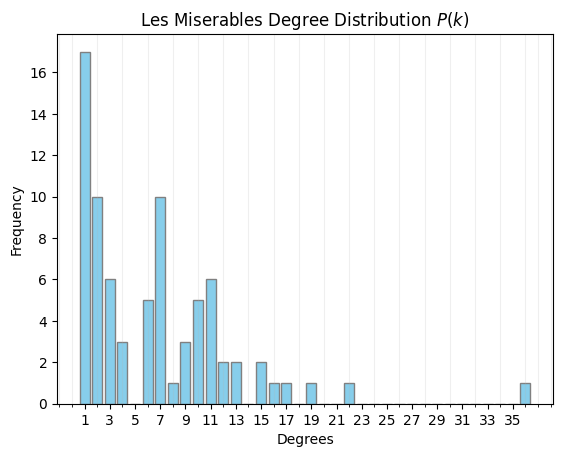

In [14]:
# Plot the degree distribution histogram P(k)
degree_sequence = [d for n, d in M.degree()]

bin_width = 1
bins = np.arange(min(degree_sequence) - 0.5, max(degree_sequence) + 1.5, bin_width)
plt.hist(degree_sequence, bins=bins, density=False, rwidth=0.8, color = "skyblue",edgecolor="grey")

x_ticks = np.arange(min(degree_sequence), max(degree_sequence) + 1, 2)
plt.xticks(x_ticks, x_ticks)
minor_locator = MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator)

plt.title("Les Miserables Degree Distribution $P(k)$")
plt.xlabel("Degrees")
plt.ylabel("Frequency")
plt.grid(which='minor', alpha=0.2)  # Add grid for minor ticks
plt.show()

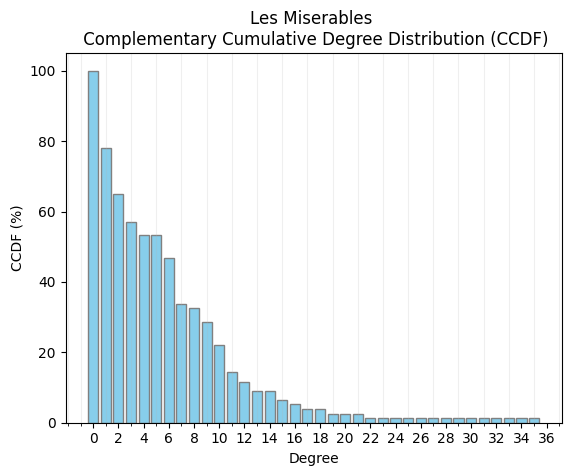

In [22]:
# Create a histogram for the CCDF
bin_width = 1
bins = np.arange(-0.5, len(ccdf) - 0.5, bin_width)
plt.hist(range(len(ccdf)), bins=bins, weights=ccdf, density=False, rwidth=0.8, color="skyblue", edgecolor="grey")

# Customize the x-axis ticks and labels
x_ticks = np.arange(0, len(ccdf), 2)
plt.xticks(x_ticks, x_ticks)

# Add minor ticks
minor_locator = MultipleLocator(1)
plt.gca().xaxis.set_minor_locator(minor_locator)

# Set plot title and labels
plt.title("Les Miserables \n Complementary Cumulative Degree Distribution (CCDF)")
plt.xlabel("Degree")
plt.ylabel("CCDF (%)")

# Add a grid for minor ticks
plt.grid(which='minor', alpha=0.2)

plt.show()